In [1]:
import pandas as pd
import plotly.express as px

data = pd.read_csv("2023-04-19-12:14:27.342438.csv")
fig = px.box(data, x="anchor", y="distance", points="all")
fig.show()

In [2]:
df = data.drop(columns=['timestamp'])
df.groupby(["anchor"]).mean()

,Unnamed: 0,distance
anchor,,
0x26bd,65.555556,2089.907122
0x5601,60.500000,1795.727783
0x6c0d,59.500000,2676.540917


Circle(1915.2160846611334, 128.02952001469828, 171.94978244035633)
67.66240677428294


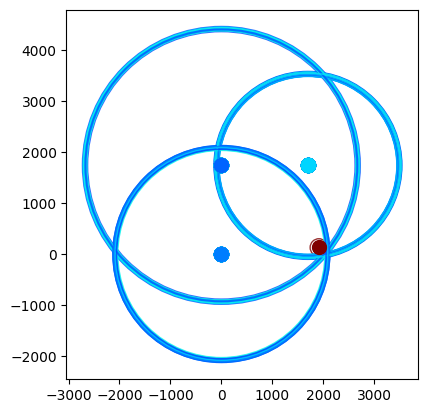

In [3]:
from coords import COORDS
from easy_trilateration.model import *
from easy_trilateration.least_squares import easy_least_squares  
from easy_trilateration.graph import *
from helpers import distance

arr = [Circle(COORDS[row["anchor"]][0], COORDS[row["anchor"]][1], row["distance"]) for _, row in df.iterrows()]

# arr = [Circle(100, 100, 50),  
# Circle(100, 50, 50),
# Circle(50, 50, 50),
# Circle(50, 100, 50)]
          
result, meta = easy_least_squares(arr)  
print(result)
print(distance(result.center, Point(*COORDS["T"])))
create_circle(result, target=True)  
draw(arr)

In [13]:
n_samples = []
errors = []

for i in range(3,len(df),3):
    arr = [Circle(COORDS[row["anchor"]][0], COORDS[row["anchor"]][1], row["distance"]) for _, row in df.head(i).iterrows()]
    # display(arr)
    # arr = [Circle(100, 100, 50),  
    # Circle(100, 50, 50),
    # Circle(50, 50, 50),
    # Circle(50, 100, 50)]
            
    result, meta = easy_least_squares(arr)  
    # print(result)
    n_samples.append(i)
    errors.append(distance(result.center, Point(*COORDS["T"])))
    # create_circle(result, target=True)  
    # draw(arr)
df2 = pd.DataFrame({"n_samples": n_samples, "error": errors})
display(df2)
px.bar(df2, x="n_samples", y="error")

,n_samples,error
0,3,111.984294
1,6,56.654893
2,9,47.942075
3,12,56.881315
4,15,53.306345
5,18,51.071978
6,21,53.595571
7,24,57.270181
8,27,56.683857
9,30,56.516765
